In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#classic
classic_client_df = pd.read_csv('logs/classic/client_log.csv')
classic_server_df = pd.read_csv('logs/classic/server_log.csv')

In [33]:
#pqc
pqc_client_df = pd.read_csv('logs/pqc/client_log.csv')
pqc_server_df = pd.read_csv('logs/pqc/server_log.csv')

In [34]:
#hybrid
hybrid_client_df = pd.read_csv('logs/hybrid/client_log.csv')
hybrid_server_df = pd.read_csv('logs/hybrid/server_log.csv')

In [38]:
dataframes = [
    ('Classic Client', classic_client_df),
    ('Classic Server', classic_server_df),
    ('PQC Client', pqc_client_df),
    ('PQC Server', pqc_server_df),
    ('Hybrid Client', hybrid_client_df),
    ('Hybrid Server', hybrid_server_df),
]

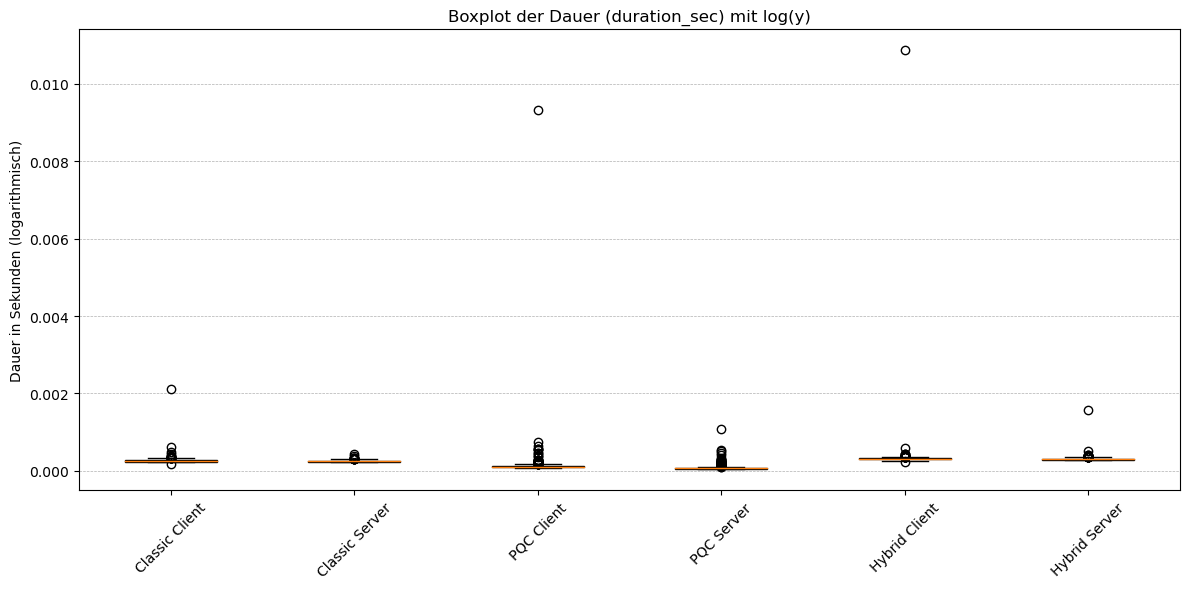

In [47]:
duration_data = [df['duration_sec'] for label, df in dataframes]
labels = [label for label, df in dataframes]

# Boxplot erstellen
plt.figure(figsize=(12, 6))
plt.boxplot(duration_data, labels=labels, patch_artist=True)
#plt.yscale('log')  # Logarithmische Skala hier aktivieren!
plt.title('Boxplot der Dauer (duration_sec) mit log(y)')
plt.ylabel('Dauer in Sekunden (logarithmisch)')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [36]:
pqc_client_df["duration_sec"].median(), pqc_server_df["duration_sec"].median()


(0.0001020432, 6.50883e-05)

In [37]:
hybrid_client_df["duration_sec"].median(), hybrid_server_df["duration_sec"].median()


(0.0003107786, 0.0003011227)

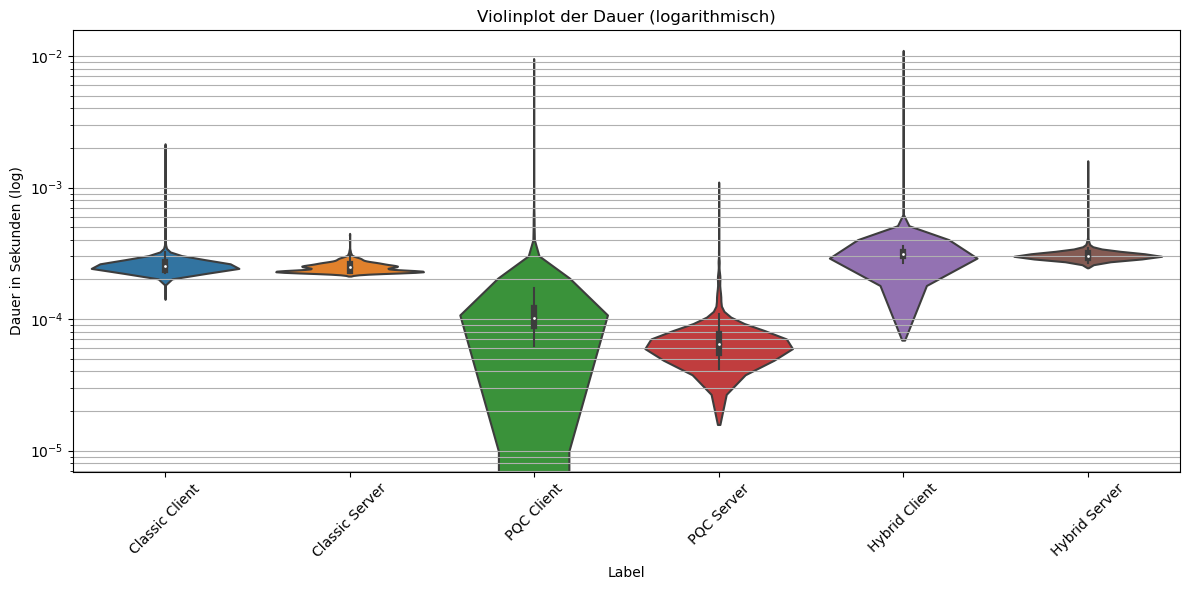

In [43]:
import seaborn as sns

# Daten vorbereiten
import pandas as pd
df_list = []
for label, df in dataframes:
    temp = df[['duration_sec']].copy()
    temp['Label'] = label
    df_list.append(temp)

merged_df = pd.concat(df_list)

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_df, x='Label', y='duration_sec', scale='width')
plt.yscale('log')
plt.title('Violinplot der Dauer (logarithmisch)')
plt.ylabel('Dauer in Sekunden (log)')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()


/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 95.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 95.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/luca/anaconda3/lib/python3.11/site-packages/seaborn/categorical.p

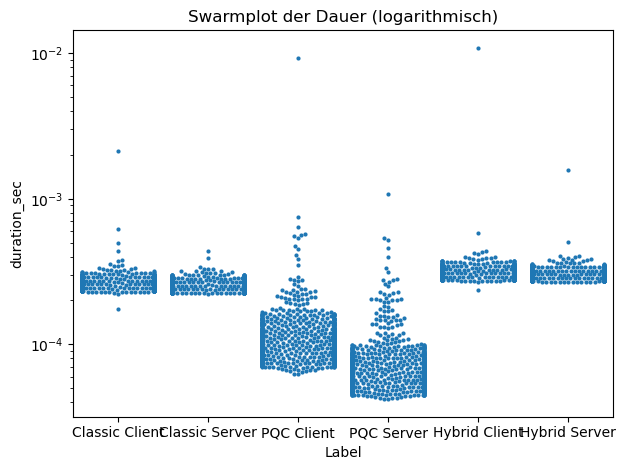

In [44]:
sns.swarmplot(data=merged_df, x='Label', y='duration_sec', size=3)
plt.yscale('log')
plt.title('Swarmplot der Dauer (logarithmisch)')
plt.tight_layout()


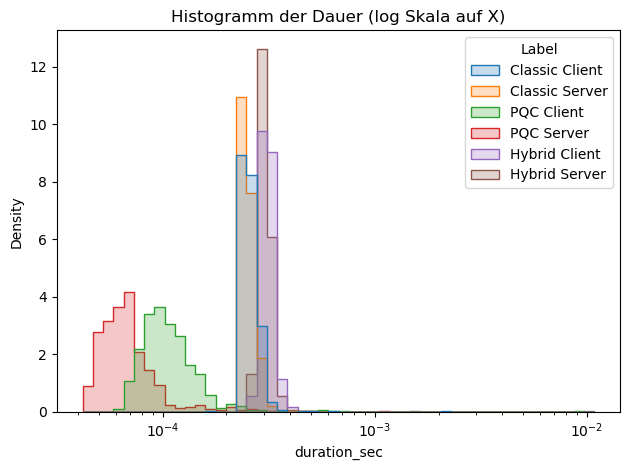

In [45]:
sns.histplot(data=merged_df, x='duration_sec', hue='Label', log_scale=(True, False), element='step', stat='density', common_norm=False)
plt.title('Histogramm der Dauer (log Skala auf X)')
plt.tight_layout()


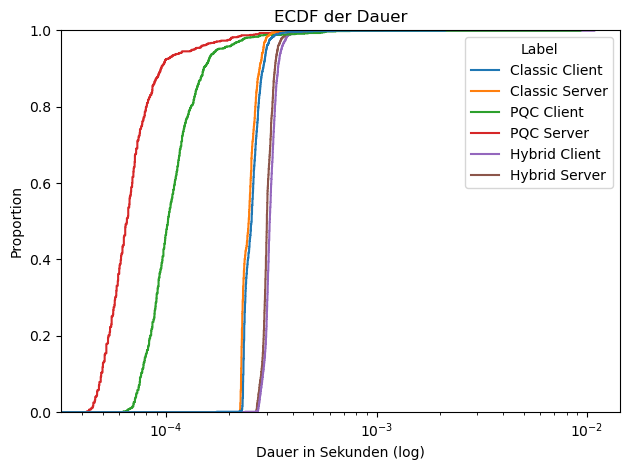

In [46]:
sns.ecdfplot(data=merged_df, x='duration_sec', hue='Label', log_scale=True)
plt.title('ECDF der Dauer')
plt.xlabel('Dauer in Sekunden (log)')
plt.tight_layout()
